<a href="https://colab.research.google.com/github/dayananikol/dl_models/blob/main/Four_Models_Test_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
import tensorflow as tf
import os

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Set paths
dataset_dir = '/content/drive/MyDrive/bentory_dataset/final_ready_dataset'

IMG_SIZE = 224
BATCH_SIZE = 32

# Test generator (no augmentation, no split)
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/bentory_dataset/final_ready_dataset_test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 550 images belonging to 11 classes.


In [26]:
from tensorflow.keras.models import load_model

model_paths = {
    "Model 1": "Model1_Unknown6_Rerun.h5",
    "Model 2": "Model2_Unknown7_Rerun.h5",
    "Model 3": "Model3_SGD_Rerun.h5",
    "Model 4": "Model4_Unknown9_Rerun.h5"
}

models = {name: load_model(path) for name, path in model_paths.items()}


In [27]:
results = {}

for name, model in models.items():
    loss, accuracy = model.evaluate(test_gen, verbose=0)
    results[name] = {"loss": loss, "accuracy": accuracy}
    print(f"{name} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Model 1 - Loss: 0.1004, Accuracy: 0.9636
Model 2 - Loss: 0.2940, Accuracy: 0.9055
Model 3 - Loss: 0.2609, Accuracy: 0.9291
Model 4 - Loss: 0.2089, Accuracy: 0.9273


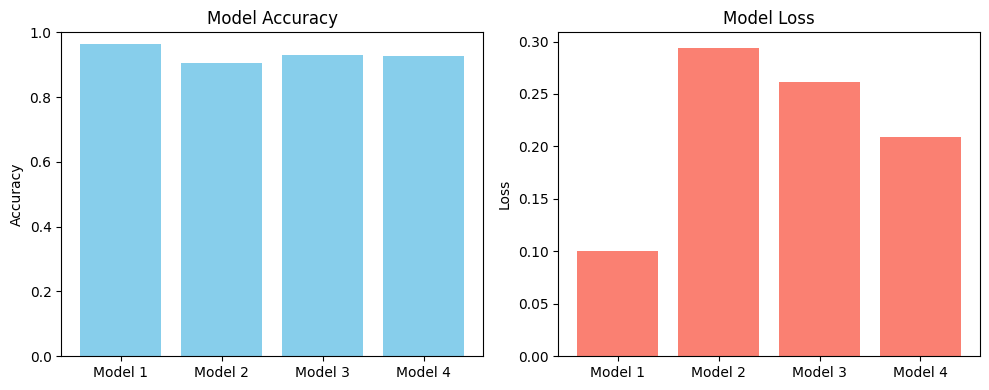

In [28]:
import matplotlib.pyplot as plt

names = list(results.keys())
accuracies = [results[n]['accuracy'] for n in names]
losses = [results[n]['loss'] for n in names]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(names, accuracies, color='skyblue')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
plt.bar(names, losses, color='salmon')
plt.title("Model Loss")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()


In [29]:
import numpy as np

# Get true labels from test_gen
true_labels = []
predicted_labels = {}
class_names = list(test_gen.class_indices.keys())

for batch_images, batch_labels in test_gen:
    true_labels.extend(np.argmax(batch_labels, axis=1))
    if len(true_labels) >= test_gen.samples:
        break

true_labels = np.array(true_labels)

# Predict for each model
for name, model in models.items():
    preds = model.predict(test_gen, verbose=0)
    predicted_labels[name] = np.argmax(preds, axis=1)



Model 1 Classification Report:
                         precision    recall  f1-score   support

             Bear Brand       1.00      1.00      1.00        50
                     C2       0.94      1.00      0.97        50
         Datu Puti Suka       0.94      1.00      0.97        50
         Datu Puti Toyo       0.98      1.00      0.99        50
                   Ligo       0.98      1.00      0.99        50
            Magic Sarap       0.94      0.88      0.91        50
Pancit Canton Kalamansi       0.98      1.00      0.99        50
              Safeguard       1.00      0.98      0.99        50
            Surf Powder       0.98      0.98      0.98        50
                Unknown       0.95      0.78      0.86        50
                  V Cut       0.91      0.98      0.94        50

               accuracy                           0.96       550
              macro avg       0.96      0.96      0.96       550
           weighted avg       0.96      0.96      0.96  

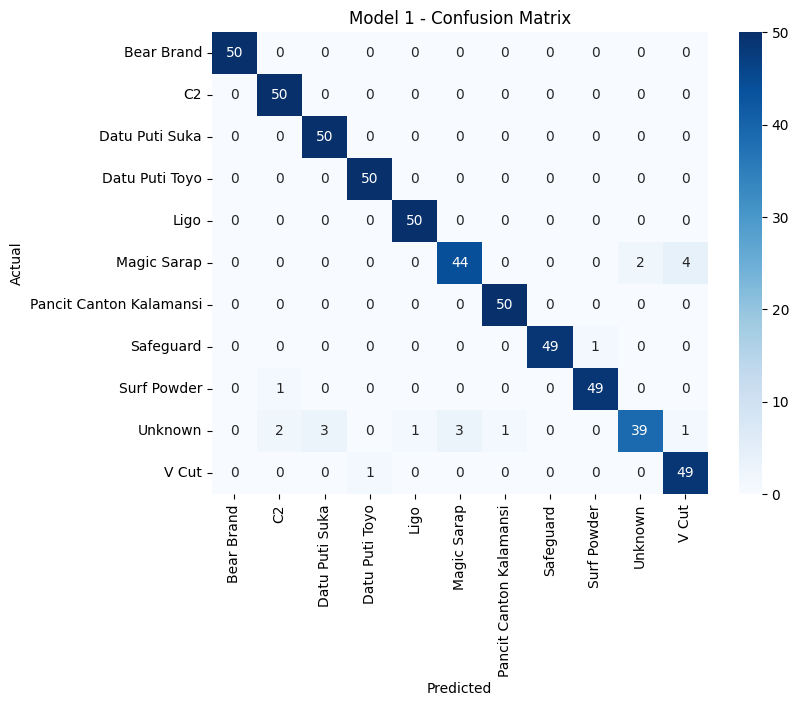


Model 2 Classification Report:
                         precision    recall  f1-score   support

             Bear Brand       0.93      1.00      0.96        50
                     C2       0.91      0.96      0.93        50
         Datu Puti Suka       0.88      1.00      0.93        50
         Datu Puti Toyo       0.91      0.98      0.94        50
                   Ligo       0.96      0.96      0.96        50
            Magic Sarap       0.87      0.90      0.88        50
Pancit Canton Kalamansi       0.94      0.98      0.96        50
              Safeguard       0.84      0.98      0.91        50
            Surf Powder       0.92      0.92      0.92        50
                Unknown       1.00      0.38      0.55        50
                  V Cut       0.88      0.90      0.89        50

               accuracy                           0.91       550
              macro avg       0.91      0.91      0.89       550
           weighted avg       0.91      0.91      0.89  

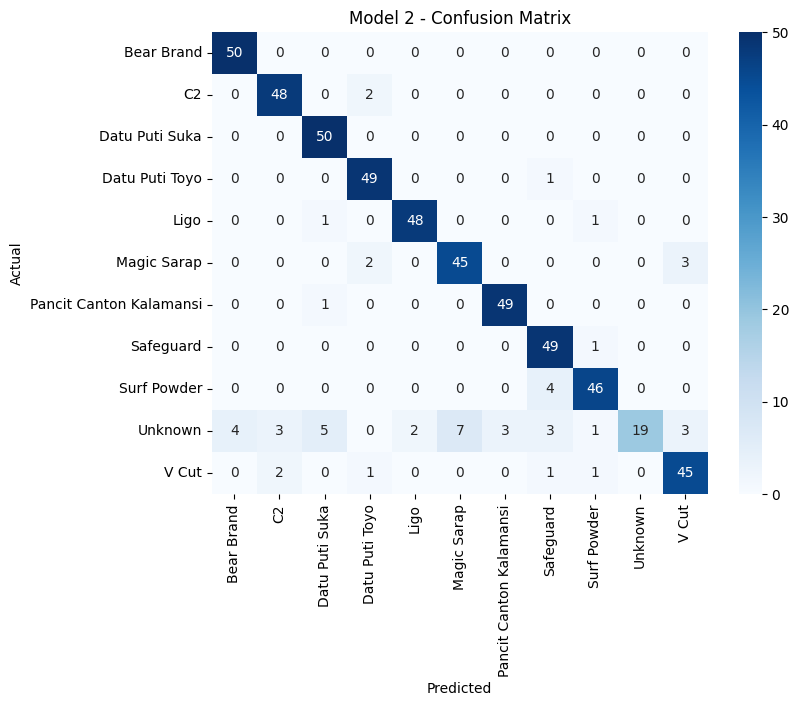


Model 3 Classification Report:
                         precision    recall  f1-score   support

             Bear Brand       0.93      1.00      0.96        50
                     C2       0.83      1.00      0.91        50
         Datu Puti Suka       0.96      1.00      0.98        50
         Datu Puti Toyo       0.83      1.00      0.91        50
                   Ligo       0.93      1.00      0.96        50
            Magic Sarap       0.93      1.00      0.96        50
Pancit Canton Kalamansi       0.98      0.96      0.97        50
              Safeguard       0.94      1.00      0.97        50
            Surf Powder       1.00      0.88      0.94        50
                Unknown       0.97      0.72      0.83        50
                  V Cut       1.00      0.66      0.80        50

               accuracy                           0.93       550
              macro avg       0.94      0.93      0.93       550
           weighted avg       0.94      0.93      0.93  

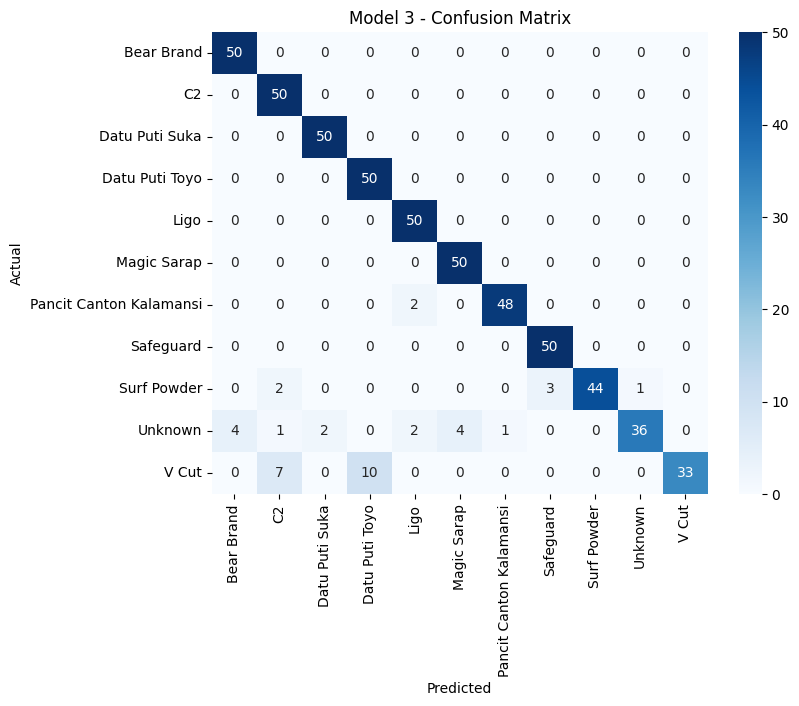


Model 4 Classification Report:
                         precision    recall  f1-score   support

             Bear Brand       0.93      1.00      0.96        50
                     C2       0.96      1.00      0.98        50
         Datu Puti Suka       0.94      1.00      0.97        50
         Datu Puti Toyo       0.89      1.00      0.94        50
                   Ligo       0.88      1.00      0.93        50
            Magic Sarap       0.90      0.94      0.92        50
Pancit Canton Kalamansi       0.94      0.98      0.96        50
              Safeguard       1.00      1.00      1.00        50
            Surf Powder       1.00      0.90      0.95        50
                Unknown       0.81      0.44      0.57        50
                  V Cut       0.90      0.94      0.92        50

               accuracy                           0.93       550
              macro avg       0.92      0.93      0.92       550
           weighted avg       0.92      0.93      0.92  

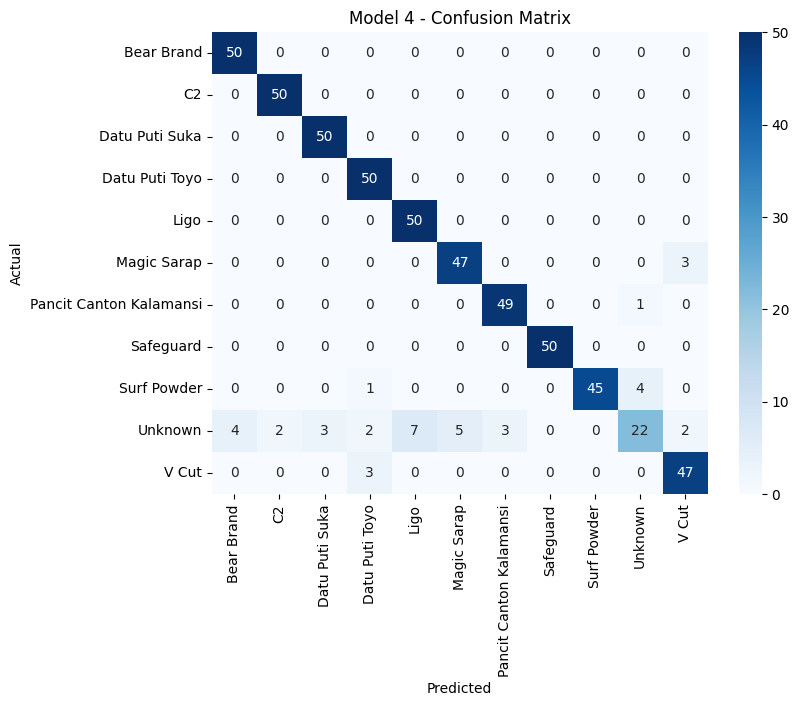

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

for name in predicted_labels:
    print(f"\n{name} Classification Report:")
    print(classification_report(true_labels, predicted_labels[name], target_names=class_names))

    cm = confusion_matrix(true_labels, predicted_labels[name])
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Predictions for Model 1:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


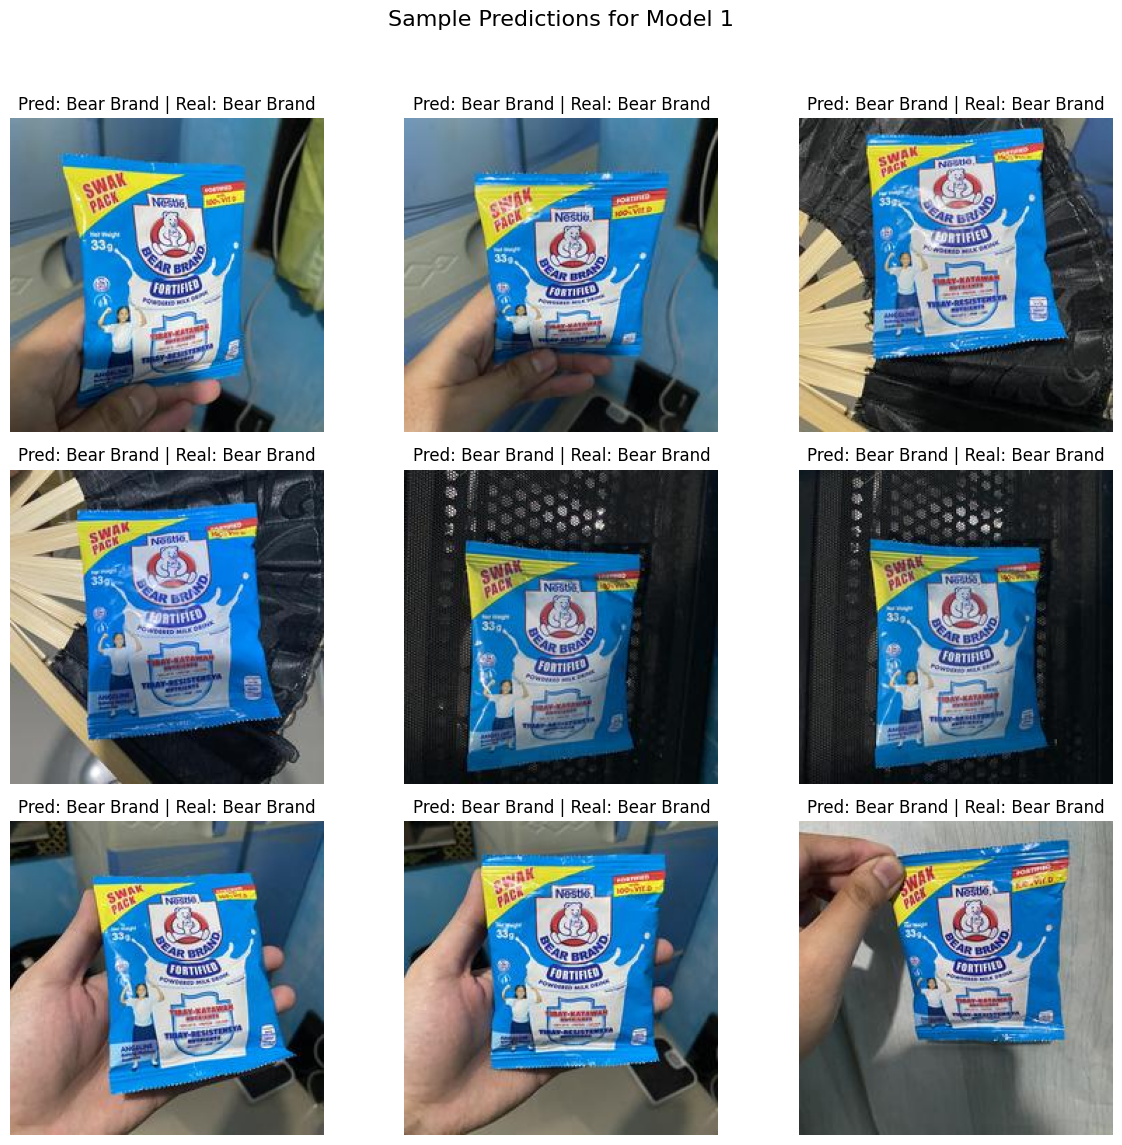

Predictions for Model 2:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


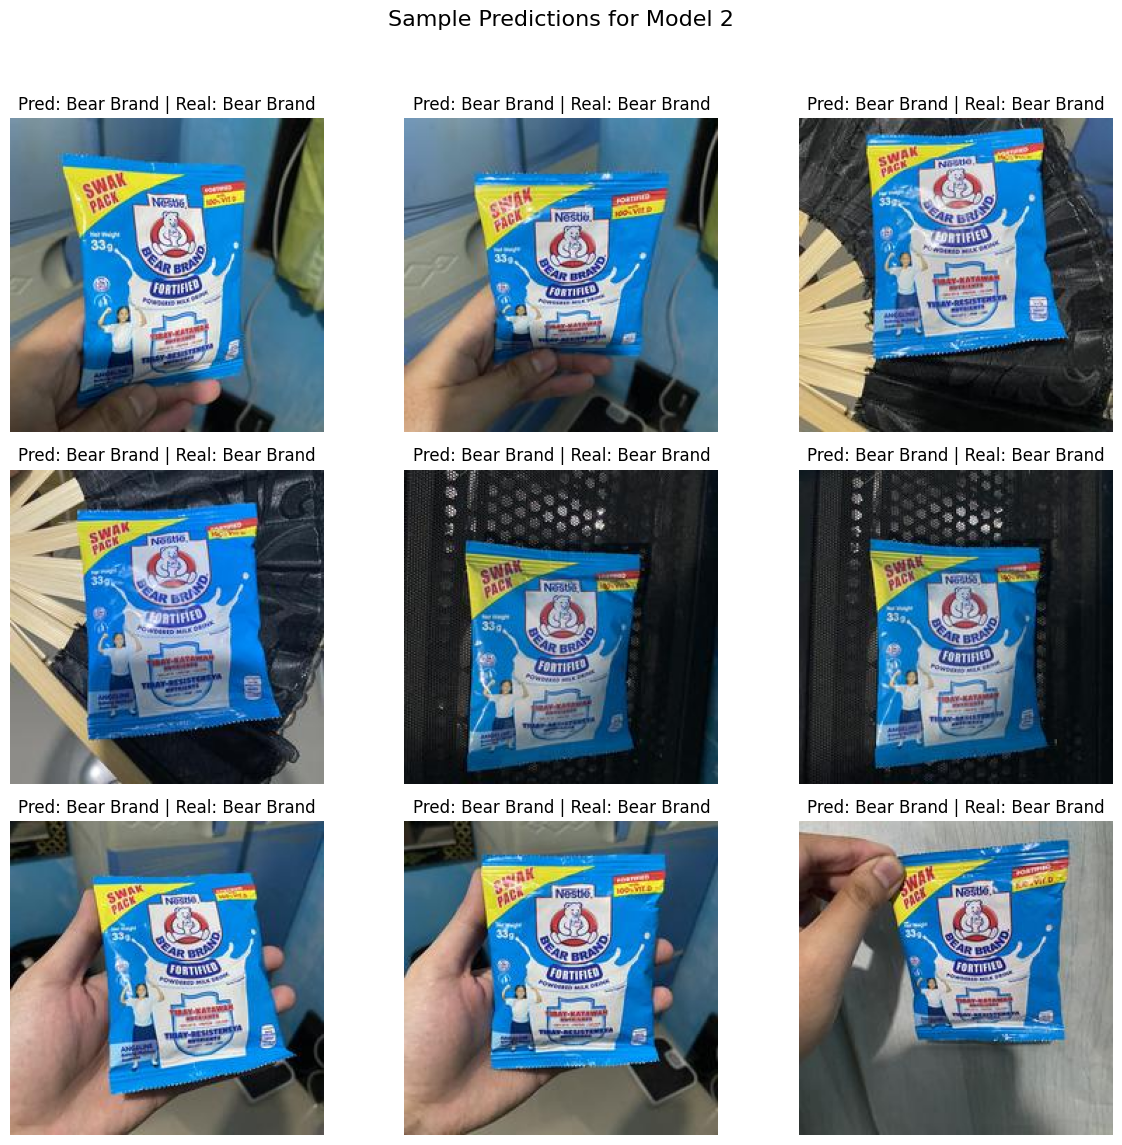

Predictions for Model 3:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


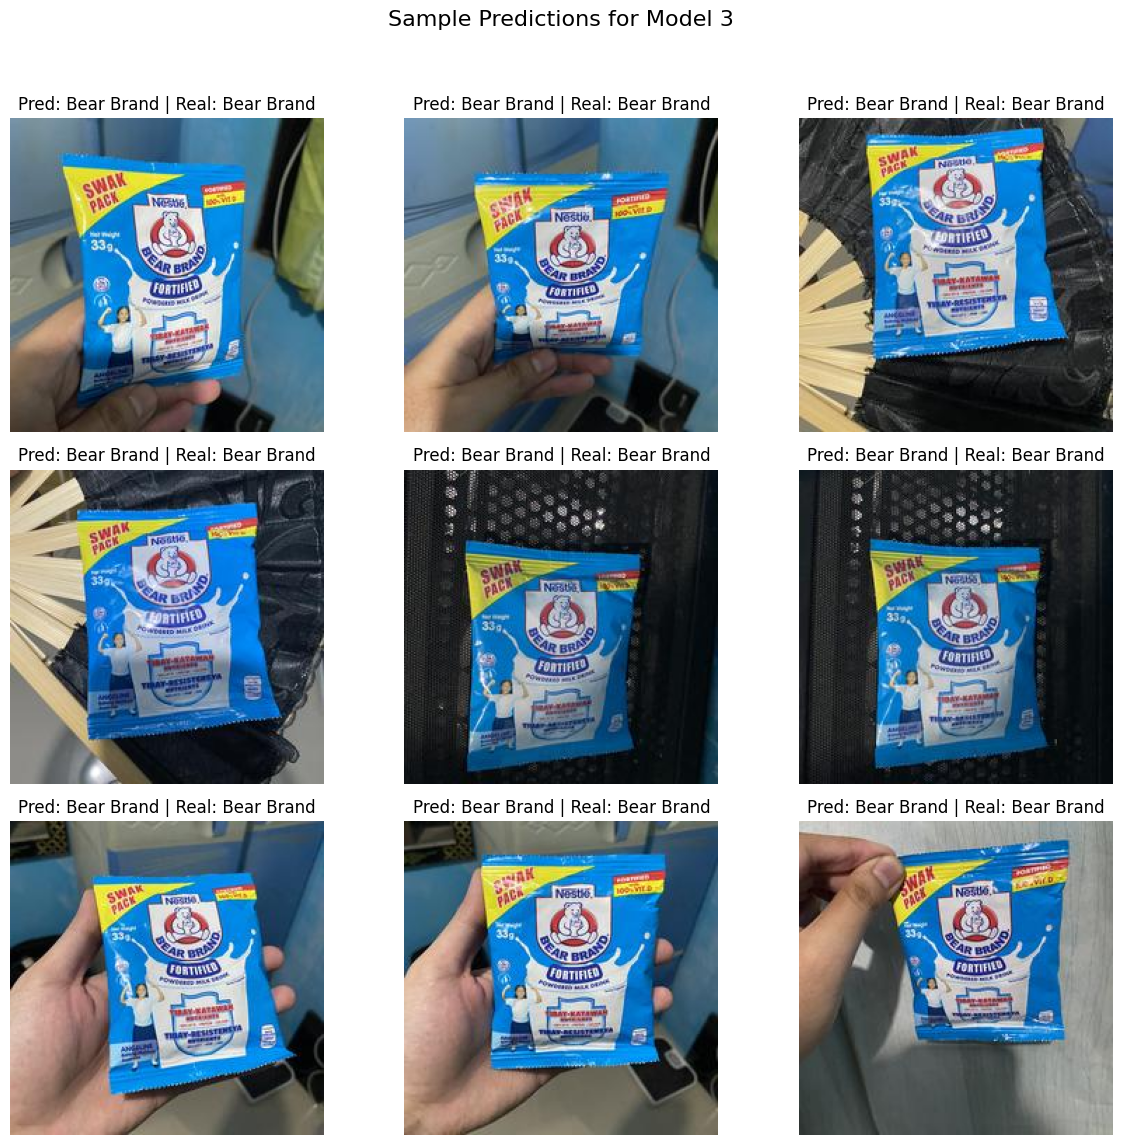

Predictions for Model 4:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step


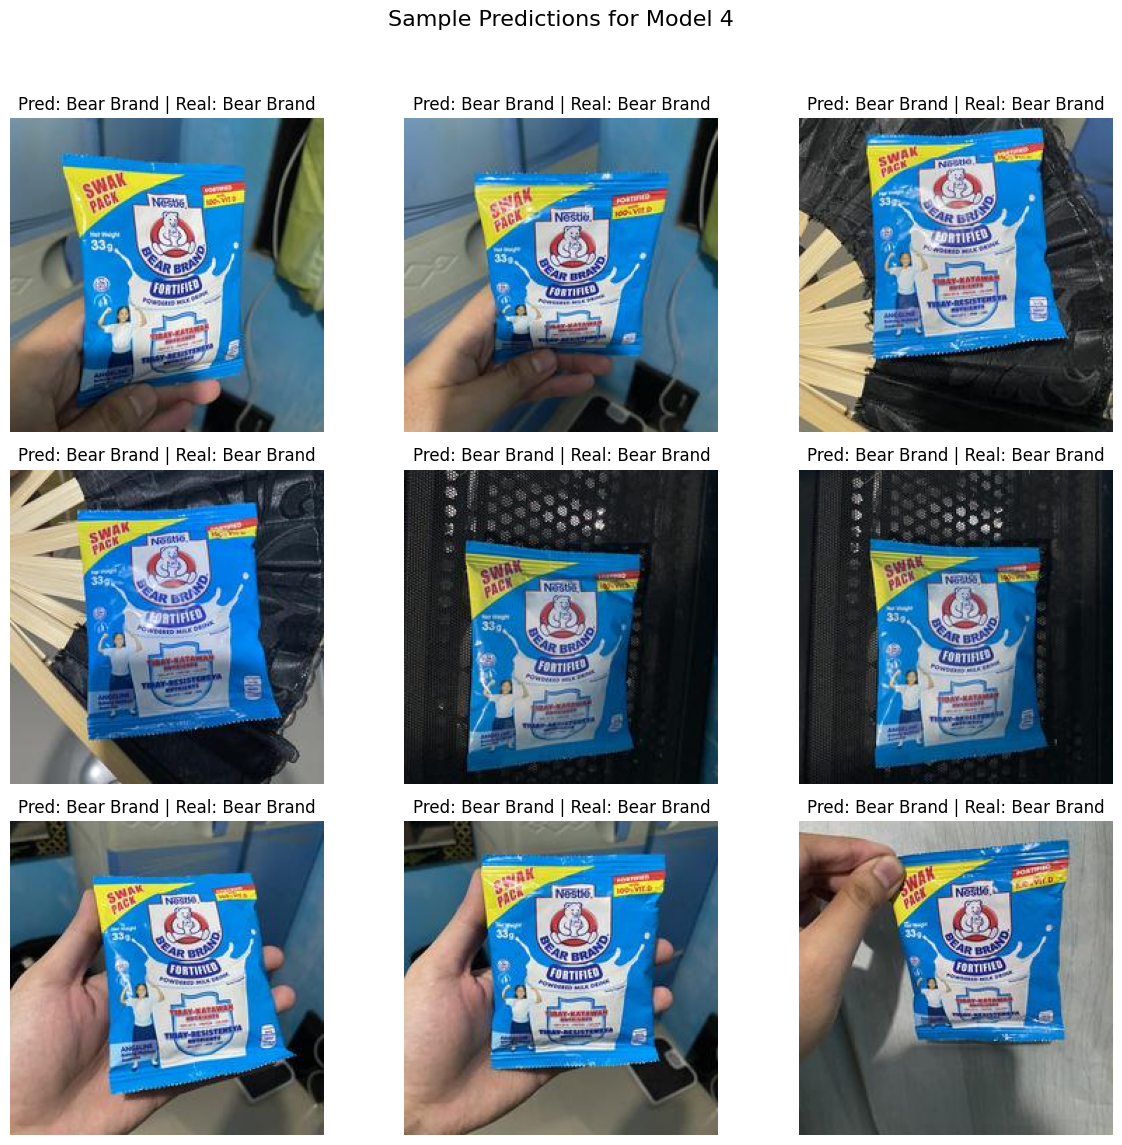

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of images and labels from the test generator
images, labels = next(test_gen)

# Get the class names from the generator
class_names = list(test_gen.class_indices.keys())

# Select the first 9 images and their true labels
num_images_to_show = 9
selected_images = images[:num_images_to_show]
selected_labels = labels[:num_images_to_show]

# Determine the true class names for the selected labels
true_class_names = [class_names[np.argmax(label)] for label in selected_labels]

# Iterate through each model and generate predictions and plots
for model_name, model in models.items():
    print(f"Predictions for {model_name}:")

    # Get predictions for the selected images
    predictions = model.predict(selected_images)
    predicted_classes = np.argmax(predictions, axis=1)
    predicted_class_names = [class_names[predicted_class] for predicted_class in predicted_classes]

    # Plot the images
    plt.figure(figsize=(12, 12))
    plt.suptitle(f"Sample Predictions for {model_name}", fontsize=16) # Add a main title
    for i in range(num_images_to_show):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(selected_images[i])
        plt.title(f"Pred: {predicted_class_names[i]} | Real: {true_class_names[i]}")
        plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
    plt.show()